In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd

# Datos sobre Películas

In [2]:
drive.mount("/content/drive/")  #Para acceder a los archivos en drive

Mounted at /content/drive/


In [8]:
#Cargando la base de datos
data_frame = pd.read_csv('/content/drive/MyDrive/Data/PopularMovies.csv',delimiter=',')
data_frame.head()

,Unnamed: 0,Movie_Names,Ratings,Released_Year,Movie_Link,Votes,Metascore,Userreviews,Criticreviews
0,0,The Shawshank Redemption,9.2,1994,https://www.imdb.com/title/tt0111161/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">2.8M</div>",82,10.9K,173
1,1,The Godfather,9.2,1972,https://www.imdb.com/title/tt0068646/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">1.9M</div>",100,5.4K,203
2,2,The Dark Knight,9.0,2008,https://www.imdb.com/title/tt0468569/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">2.7M</div>",84,8.5K,448
3,3,The Godfather Part II,9.0,1974,https://www.imdb.com/title/tt0071562/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">1.3M</div>",90,1.3K,136
4,4,12 Angry Men,9.0,1957,https://www.imdb.com/title/tt0050083/?pf_rd_m=...,"<div class=""sc-bde20123-3 bjjENQ"">815K</div>",97,2K,165


In [11]:
Xh = data_frame[['Released_Year', 'Metascore', 'Criticreviews']]

Xh = Xh.to_numpy()

yh = data_frame['Ratings'].to_numpy()

label = ['Released_Year', 'Metascore', 'Criticreviews']

Xh.shape


(250, 3)

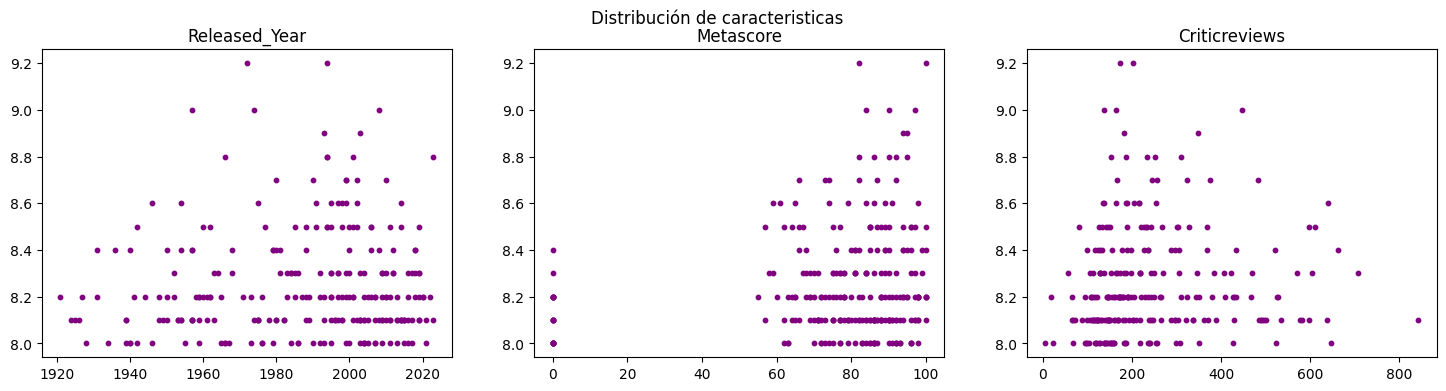

In [19]:
fig, ax = plt.subplots(1, 3, figsize = (18, 4))
fig.suptitle('Distribución de caracteristicas')
for i in range(Xh.shape[1]):
  ax[i].scatter(Xh[:, i], yh, color = 'purple', s=10)
  ax[i].set_title(label[i])

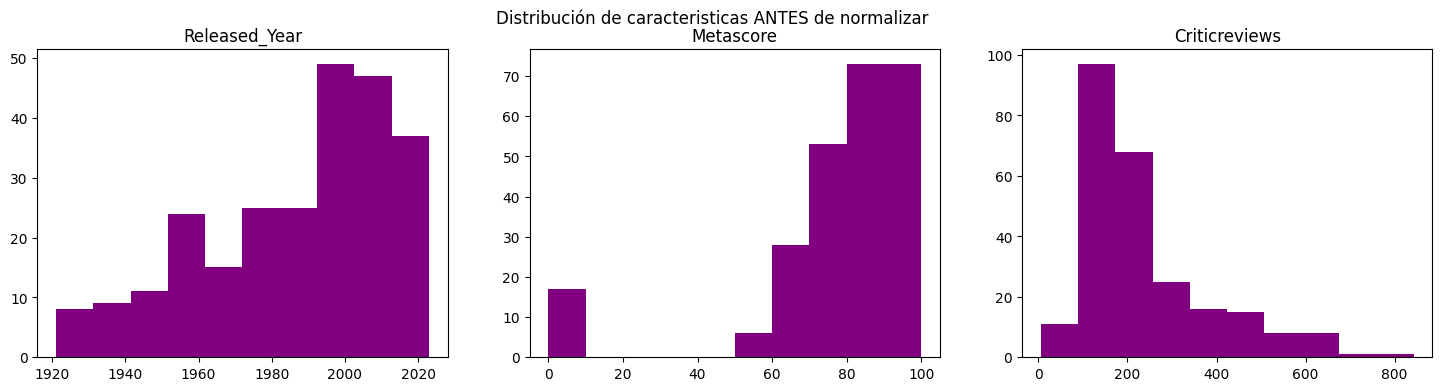

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (18, 4))
fig.suptitle('Distribución de caracteristicas ANTES de normalizar')
for i in range(Xh.shape[1]):
  ax[i].hist(Xh[:, i], color = 'purple')
  ax[i].set_title(label[i])

In [22]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)  #Para normalizar los datos

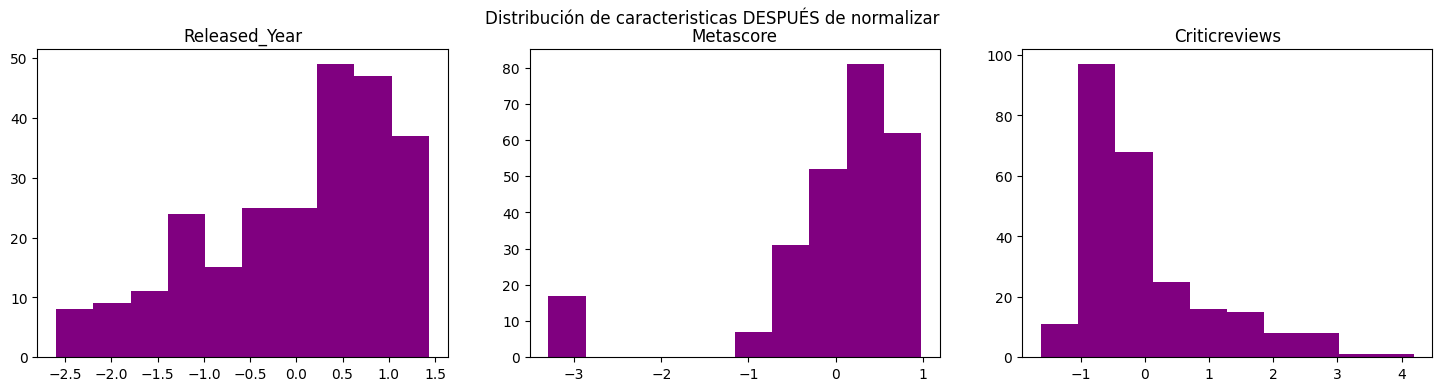

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (18, 4))
fig.suptitle('Distribución de caracteristicas DESPUÉS de normalizar')

for i in range(Xh_norm.shape[1]):
  ax[i].hist(Xh_norm[:, i], color = 'purple')
  ax[i].set_title(label[i])

In [26]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, yh)

print(sgdr)
print(f'Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}')

SGDRegressor(learning_rate='constant')
Number of iterations completed: 8, number of weight updates: 2001.0


In [27]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w: {w0_norm}, b:{w_norm}")

model parameters:  w: [8.2377771], b:[0.0169744  0.02910524 0.00927293]


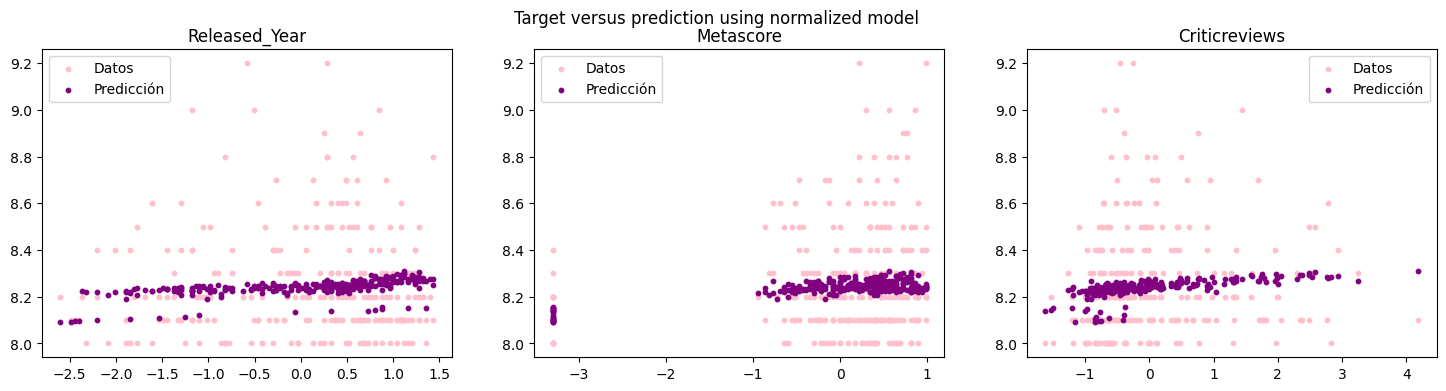

In [35]:
yp = w0_norm[0]

for i in range(Xh_norm.shape[1]):
  yp += Xh_norm[:,i]*w_norm[i]


fig, ax = plt.subplots(1, 3, figsize = (18, 4))
fig.suptitle('Target versus prediction using normalized model')

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh_norm[:, i], yh, color = 'pink', s=10, label = 'Datos')
  ax[i].scatter(Xh_norm[:, i], yp, color = 'purple', s=10, label = 'Predicción')
  ax[i].set_title(label[i])
  ax[i].legend();

Ahora, separándo el dataset en train y test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, yh, test_size=0.30, random_state=42)

In [38]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)

print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 9, number of weight updates: 1576.0


In [39]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:    w: {w0_norm}, b:{w_norm}")

model parameters:    w: [8.27437589], b:[0.01499917 0.04614918 0.00391559]


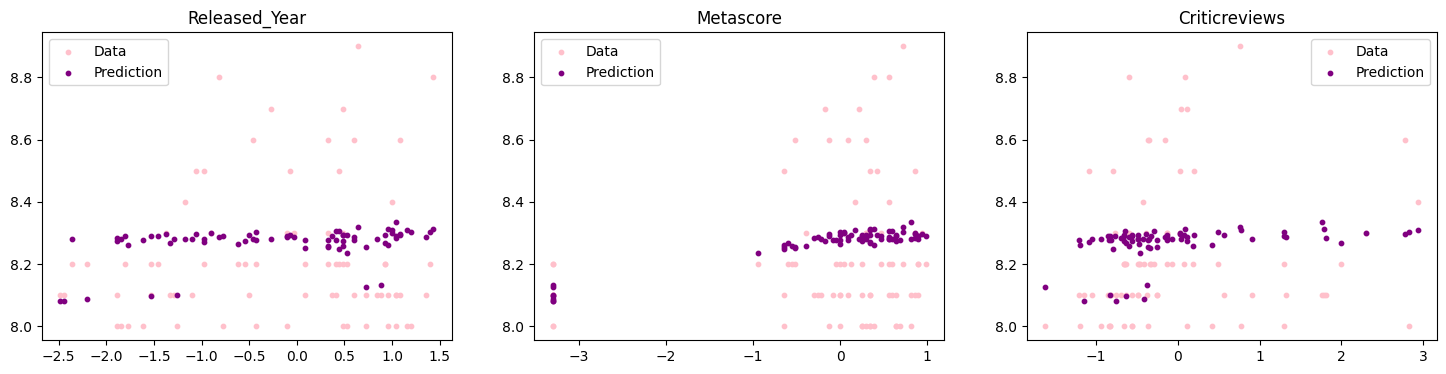

In [42]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_test[:,i]


fig, ax = plt.subplots(1, 3, figsize = (18, 4))


for i in range(X_test.shape[1]):
  ax[i].scatter(X_test[:, i], y_test, color = 'pink', s=10, label = 'Data')
  ax[i].scatter(X_test[:, i], yp, color = 'purple', s=10, label = 'Prediction')
  ax[i].set_title(label[i])
  ax[i].legend();

In [43]:
sgdr.score(X_test, y_test)

-0.005894573366197031

# Usando KERAS

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [45]:
input_dim = 3
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
num_epochs = 100
batch_size =X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 69.5833
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 66.8368
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 64.1988
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 61.6651
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 59.2315
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 56.8941
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 54.6491
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 52.4927
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 50.4216
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 48.4323
Epoch 11/100
1/1 [==============================] - 0s 30ms/step - loss: 46.5216
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 44.6865
Epoch 13/100
1/1 [=====================

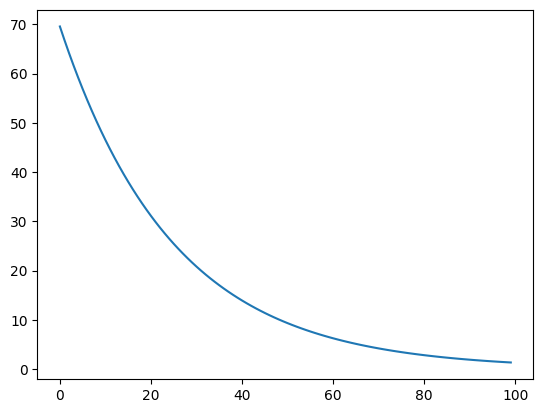

In [47]:
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [48]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[0.14744404]
 [0.00828322]
 [0.0755882 ]] [7.1568503]


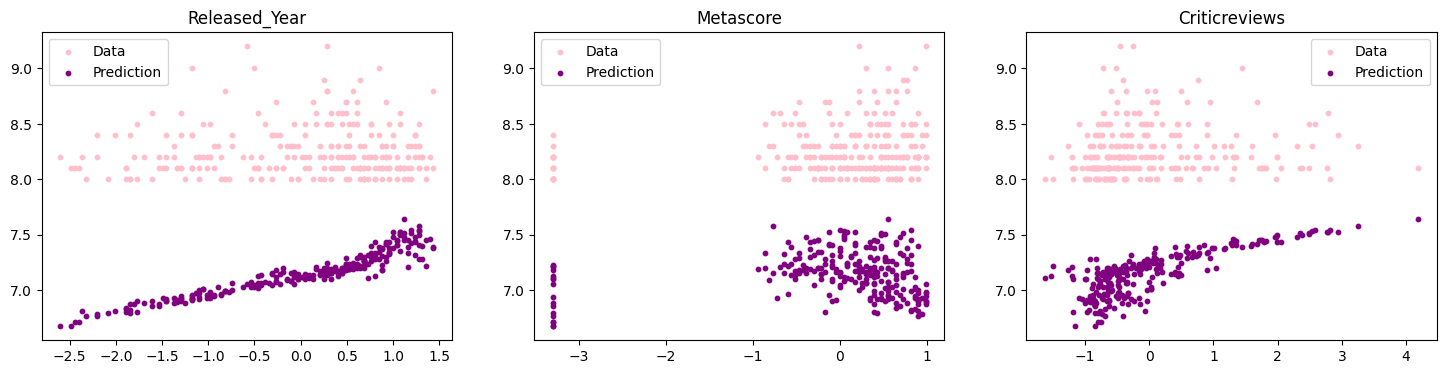

In [50]:
yp = b[0]

for i in range(Xh_norm.shape[1]):
  yp += Xh_norm[:,i]*w[i]


fig, ax = plt.subplots(1, 3, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(Xh_norm[:, i], yh, color = 'pink', s=10, label = 'Data')
  ax[i].scatter(Xh_norm[:, i], yp, color = 'purple', s=10, label = 'Prediction')
  ax[i].set_title(label[i])
  ax[i].legend();

Entrenamos los datos para el split

In [51]:
history2 = model.fit(X_test, y_test, epochs=num_epochs, batch_size=batch_size, verbose=1,
                     validation_data = (X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 734ms/step - loss: 1.2798 - val_loss: 1.2253
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 1.2253 - val_loss: 1.1733
Epoch 3/100
1/1 [==============================] - 0s 50ms/step - loss: 1.1733 - val_loss: 1.1238
Epoch 4/100
1/1 [==============================] - 0s 145ms/step - loss: 1.1238 - val_loss: 1.0767
Epoch 5/100
1/1 [==============================] - 0s 91ms/step - loss: 1.0767 - val_loss: 1.0318
Epoch 6/100
1/1 [==============================] - 0s 94ms/step - loss: 1.0318 - val_loss: 0.9890
Epoch 7/100
1/1 [==============================] - 0s 105ms/step - loss: 0.9890 - val_loss: 0.9482
Epoch 8/100
1/1 [==============================] - 0s 88ms/step - loss: 0.9482 - val_loss: 0.9093
Epoch 9/100
1/1 [==============================] - 0s 214ms/step - loss: 0.9093 - val_loss: 0.8722
Epoch 10/100
1/1 [==============================] - 0s 239ms/step - loss: 0.8722 - val_loss: 0.8368
Epoch 11/100
1

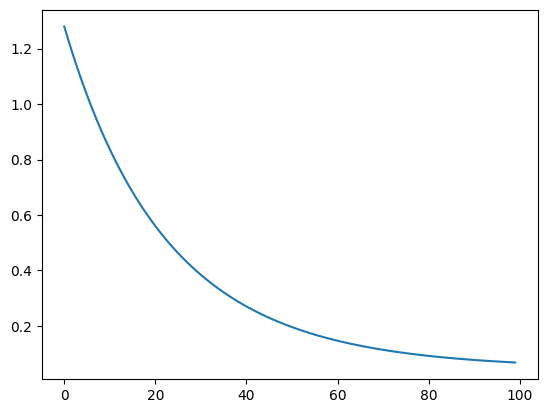

In [52]:
history_df = pd.DataFrame(history2.history)
# use Pandas native plot method
history_df['loss'].plot();

In [53]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[-0.01495636]
 [ 0.00745752]
 [ 0.02519787]] [8.082521]


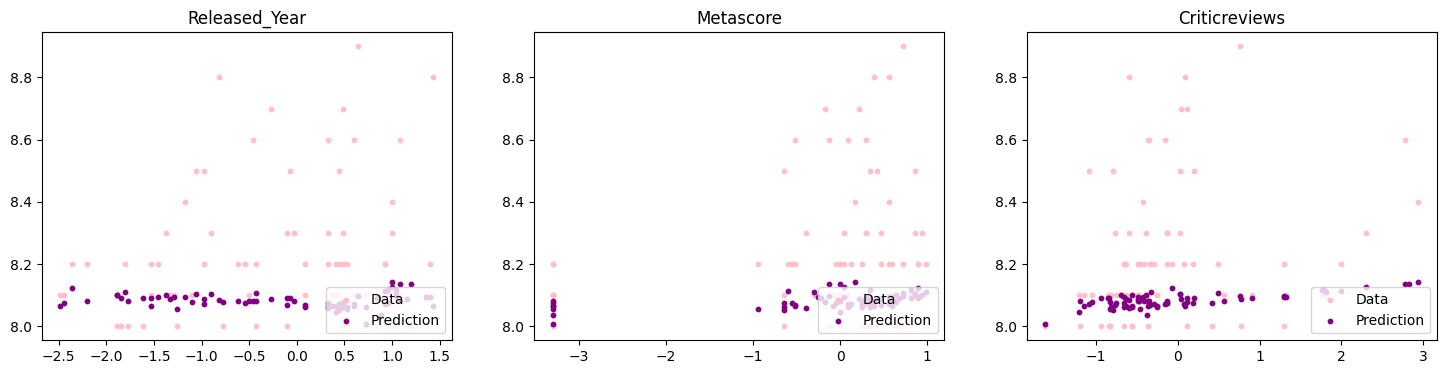

In [55]:
yp = b[0]

for i in range(Xh_norm.shape[1]):
  yp += X_test[:,i]*w[i]


fig, ax = plt.subplots(1, 3, figsize = (18, 4))

for i in range(Xh.shape[1]):
  ax[i].scatter(X_test[:, i], y_test, color = 'pink', s=10, label = 'Data')
  ax[i].scatter(X_test[:, i], yp, color = 'purple', s=10, label = 'Prediction')
  ax[i].set_title(label[i])
  ax[i].legend(loc = 4);